In [2]:
from PIL import Image, ImageDraw, JpegImagePlugin
from matplotlib import pyplot as plt
from matplotlib import patches
from sklearn.cluster import KMeans
import numpy as np

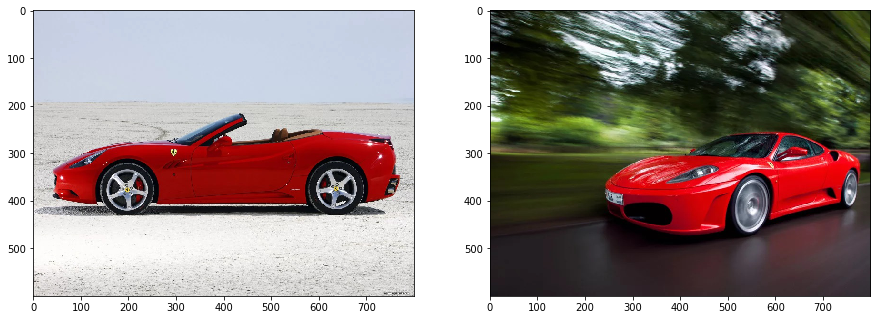

In [4]:
img_1 = Image.open('data/car.jpg')
img_2 = Image.open('data/car_2.jpg')
pix_1 = np.array(img_1)
pix_2 = np.array(img_2)
fig, ax = plt.subplots(1, 2, figsize=(15,6))
ax[0].imshow(pix_1)
ax[1].imshow(pix_2)

In [5]:
X_1 = [(x, y, pix_1[x, y][0], pix_1[x, y][1], pix_1[x, y][2]) for x in range(pix_1.shape[0]) for y in range(pix_1.shape[1])]
X_2 = [(x, y, pix_2[x, y][0], pix_2[x, y][1], pix_2[x, y][2]) for x in range(pix_2.shape[0]) for y in range(pix_2.shape[1])]
db_1 = KMeans(n_clusters=60, n_jobs=-1)
db_2 = KMeans(n_clusters=60, n_jobs=-1)

In [6]:
%%time
clusters_1 = db_1.fit_predict(X_1)
clusters_2 = db_2.fit_predict(X_2)

Wall time: 6min 29s


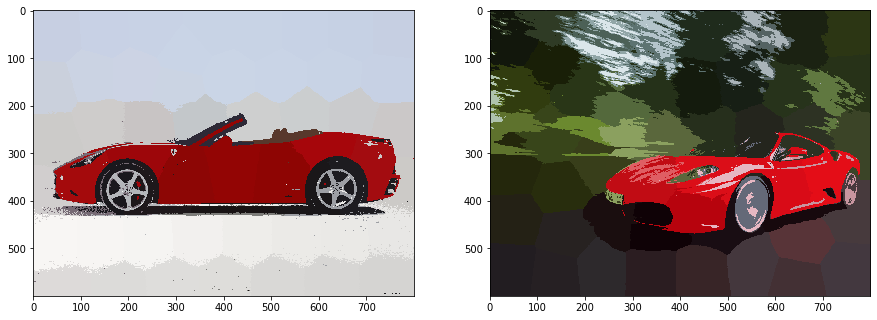

In [11]:
pix_cl_1 = np.zeros(pix_1.shape, np.uint8)
pix_cl_2 = np.zeros(pix_2.shape, np.uint8)

for p, c in zip(X_1, clusters_1):
    pix_cl_1[p[0], p[1]] = (int(db_1.cluster_centers_[c, 2]), 
                            int(db_1.cluster_centers_[c, 3]), 
                            int(db_1.cluster_centers_[c, 4]))
for p, c in zip(X_2, clusters_2):
    pix_cl_2[p[0], p[1]] = (int(db_2.cluster_centers_[c, 2]), 
                            int(db_2.cluster_centers_[c, 3]), 
                            int(db_2.cluster_centers_[c, 4]))

fig, ax = plt.subplots(1, 2, figsize=(15,6))
ax[0].imshow(pix_cl_1)
ax[1].imshow(pix_cl_2)

In [23]:
obj_color_borders = {'red': {'left': 100,
                             'right': 250},
                     'green': {'left': 0,
                               'right': 50},
                     'blue': {'left': 0,
                              'right': 50}}

In [24]:
obj_1 = []
obj_2 = []
print('Object_1 pixels:')
for i, c in enumerate(db_1.cluster_centers_):
    if (obj_color_borders['red']['left'] < c[2] < obj_color_borders['red']['right']) and \
       (obj_color_borders['green']['left'] < c[3] < obj_color_borders['green']['right']) and \
       (obj_color_borders['blue']['left'] < c[4] < obj_color_borders['blue']['right']):
        print(i, c)
        obj_1.append(i)

print('Object_2 pixels:')
for i, c in enumerate(db_2.cluster_centers_):
    if (obj_color_borders['red']['left'] < c[2] < obj_color_borders['red']['right']) and \
       (obj_color_borders['green']['left'] < c[3] < obj_color_borders['green']['right']) and \
       (obj_color_borders['blue']['left'] < c[4] < obj_color_borders['blue']['right']):
        print(i, c)
        obj_2.append(i)

Object_1 pixels:
6 [286.27706365 613.79417686 166.56636209   6.60058851  11.12931702]
9 [345.18347819 519.97663663 142.76413364   5.05900646   3.80368392]
15 [354.60201613  99.64045699 164.98104839  10.70174731  12.30174731]
16 [304.57979502 231.2079063  157.28312592   6.82521962  10.75      ]
24 [331.90988215 418.07756297 147.31926365   5.52283756   4.57452053]
25 [325.00228475 719.32419432 163.37974988  12.84319384  16.6485089 ]
39 [350.54220399 322.30823983 141.63230615   6.80128957   5.7070005 ]
Object_2 pixels:
10 [424.88720502 431.69095042 183.98874215   3.61214549  13.72775493]
16 [358.88583572 620.62162696 217.6662054   11.89829001  23.32331719]
31 [366.13026102 322.42537779 193.57974273  12.83626827  20.13063569]
53 [345.36594116 708.55536953 228.83867496  13.96687395  23.36546281]
55 [345.0308642  462.31849225 219.226031    14.00328343  24.59981613]


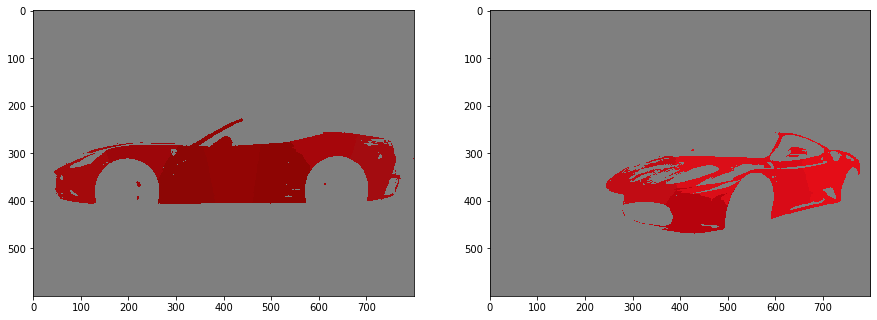

In [25]:
pix_res_1 = np.zeros(pix_cl_1.shape, np.uint8)
pix_res_2 = np.zeros(pix_cl_2.shape, np.uint8)

for p, c in zip(X_1, clusters_1):
    if c in obj_1:
        pix_res_1[p[0], p[1]] = (int(db_1.cluster_centers_[c, 2]), 
                                 int(db_1.cluster_centers_[c, 3]), 
                                 int(db_1.cluster_centers_[c, 4]))
    else: pix_res_1[p[0], p[1]] = int(255/2)

for p, c in zip(X_2, clusters_2):
    if c in obj_2:
        pix_res_2[p[0], p[1]] = (int(db_2.cluster_centers_[c, 2]), 
                                 int(db_2.cluster_centers_[c, 3]), 
                                 int(db_2.cluster_centers_[c, 4]))
    else: pix_res_2[p[0], p[1]] = int(255/2)

fig, ax = plt.subplots(1, 2, figsize=(15,6))
ax[0].imshow(pix_res_1)
ax[1].imshow(pix_res_2)